#📌 Extracción

In [2]:
# Telecom X - Análisis de Evasión de Clientes (Churn Analysis)
# Proyecto: Identificación de patrones y factores de evasión de clientes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import json
from urllib.parse import urlparse
import warnings
warnings.filterwarnings('ignore')


In [3]:
# =============================================================================
# 1. EXTRACCIÓN DE DATOS
# =============================================================================

# Importacion de datos
def cargar_datos_api():
    """
    Carga los datos desde la API de Telecom X
    """
    try:
        # URL de la API (raw GitHub URL)
        api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

        print("📡 Conectando a la API de Telecom X...")
        response = requests.get(api_url, timeout=30)
        response.raise_for_status()

        # Cargar datos JSON
        data = response.json()
        print(f"✅ Datos cargados exitosamente: {len(data)} registros")

        return data

    except requests.exceptions.RequestException as e:
        print(f"❌ Error al conectar con la API: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"❌ Error al decodificar JSON: {e}")
        return None

# Cargar datos
datos_json = cargar_datos_api()

if datos_json is None:
    print("❌ No se pudieron cargar los datos. Terminando análisis.")
    exit()


📡 Conectando a la API de Telecom X...
✅ Datos cargados exitosamente: 7267 registros


#🔧 Transformación

In [4]:

# =============================================================================
# 2. TRANSFORMACIÓN DE DATOS
# =============================================================================

print("\n🔄 TRANSFORMACIÓN DE DATOS")
print("-" * 40)

# Convertir a DataFrame
df = pd.DataFrame(datos_json)
print(f"📊 DataFrame creado: {df.shape[0]} filas x {df.shape[1]} columnas")

# Información básica del dataset
print("\n📋 INFORMACIÓN DEL DATASET:")
print(f"• Dimensiones: {df.shape}")
print(f"• Columnas: {list(df.columns)}")
print(f"• Tipos de datos:")
print(df.dtypes)
df


🔄 TRANSFORMACIÓN DE DATOS
----------------------------------------
📊 DataFrame creado: 7267 filas x 6 columnas

📋 INFORMACIÓN DEL DATASET:
• Dimensiones: (7267, 6)
• Columnas: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
• Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
# Tiene diccionarios anidados, asi que debemos normalizar
df_normalizado = pd.json_normalize(datos_json)
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [6]:
# MUY IMPORTANTE!!!
# Comprobación de incoherencias en los datos
# Verifica si hay valores únicos en cada columna
for col in df_normalizado.columns:
  print(f"valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(df_normalizado[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [7]:
# ver si los tipos de datos son correctos
print(df_normalizado.dtypes)

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [8]:
# corregir tipos de datos incorrectos
#Cambiando la columna "account.Charges.Total" a Float
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print(df_normalizado['account.Charges.Total'].dtype)

float64


In [9]:
#Duplicados
print("Numero de duplicados", df_normalizado.duplicated().sum())

Numero de duplicados 0


In [10]:
# Nulos
print("Numero de Nulos", df_normalizado.isnull().sum())

Numero de Nulos customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [11]:
# Vacíos o en blanco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [12]:
# Eliminando las columnas de Churn
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_normalizado))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [13]:
# Análisis Descriptivo
print(f"\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
df_normalizado.describe()


📈 ESTADÍSTICAS DESCRIPTIVAS:


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
# Creando columna "cuentas diarias"
df_normalizado['Cuentas_diarias'] = df_normalizado['account.Charges.Monthly'] / 30
print(df_normalizado[['account.Charges.Monthly', 'Cuentas_diarias']])

      account.Charges.Monthly  Cuentas_diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7043 rows x 2 columns]


In [15]:
# como genera la ultima columna: Cuentas_Diarias NaN NaN la quitamos
df_normalizado = df_normalizado.drop('Cuentas_diarias', errors='ignore')

In [16]:
print(df_normalizado[['account.Charges.Monthly', 'Cuentas_diarias']])

      account.Charges.Monthly  Cuentas_diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7043 rows x 2 columns]


In [17]:
df_normalizado.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_diarias'],
      dtype='object')

In [18]:
# Estandarización y transformación de datos
# cambiando los nombres de las columnas
df1 = df_normalizado.copy()

nuevos_nombres = [

    'ID_cliente',
    'Evasion',
    'Género',
    'Persona_mayor',
    'Socio',
    'Dependientes',
    'Antigüedad',
    'Servicio_telefónico',
    'Varias_líneas',
    'Servicio_internet',
    'Seguridad_en_línea',
    'Copia_de_seguridad_en_línea',
    'Protección_dispositivo',
    'Soporte_técnico',
    'Transmisión_de_televisión',
    'Transmisión_de_películas',
    'Contrato',
    'Facturación_electrónica',
    'Método_pago',
    'Cargos_mensuales',
    'Cargos_total',
    'Cuentas_diarias'
    ]


df_normalizado.columns = nuevos_nombres
df_normalizado

,ID_cliente,Evasion,Género,Persona_mayor,Socio,Dependientes,Antigüedad,Servicio_telefónico,Varias_líneas,Servicio_internet,...,Protección_dispositivo,Soporte_técnico,Transmisión_de_televisión,Transmisión_de_películas,Contrato,Facturación_electrónica,Método_pago,Cargos_mensuales,Cargos_total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [19]:
# =============================================================================
# 3. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
# =============================================================================

print("\n🔍 ANÁLISIS EXPLORATORIO DE DATOS")
print("-" * 40)

# Análisis de la variable objetivo (Churn)
if 'Churn' in df_normalizado.columns:
    churn_counts = df_normalizado['Churn'].value_counts()
    churn_rate = (churn_counts.get('Yes', 0) / len(df_normalizado)) * 100

    print(f"\n📊 ANÁLISIS DE EVASIÓN (CHURN):")
    print(f"• Total de clientes: {len(df_normalizado):,}")
    print(f"• Clientes que se fueron: {churn_counts.get('Yes', 0):,}")
    print(f"• Clientes que permanecen: {churn_counts.get('No', 0):,}")
    print(f"• Tasa de evasión: {churn_rate:.2f}%")

# Análisis por categorías demográficas
categorical_columns = df_normalizado.select_dtypes(include=['object']).columns
numerical_columns = df_normalizado.select_dtypes(include=['int64', 'float64']).columns

print(f"\n📋 COLUMNAS CATEGÓRICAS: {list(categorical_columns)}")
print(f"📋 COLUMNAS NUMÉRICAS: {list(numerical_columns)}")



🔍 ANÁLISIS EXPLORATORIO DE DATOS
----------------------------------------

📋 COLUMNAS CATEGÓRICAS: ['ID_cliente', 'Evasion', 'Género', 'Socio', 'Dependientes', 'Servicio_telefónico', 'Varias_líneas', 'Servicio_internet', 'Seguridad_en_línea', 'Copia_de_seguridad_en_línea', 'Protección_dispositivo', 'Soporte_técnico', 'Transmisión_de_televisión', 'Transmisión_de_películas', 'Contrato', 'Facturación_electrónica', 'Método_pago']
📋 COLUMNAS NUMÉRICAS: ['Persona_mayor', 'Antigüedad', 'Cargos_mensuales', 'Cargos_total', 'Cuentas_diarias']


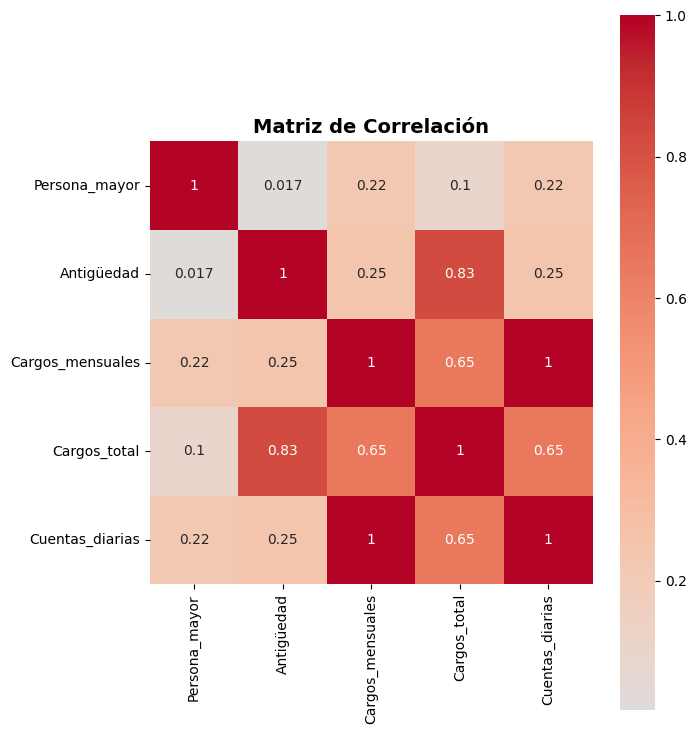

In [20]:
# =============================================================================
# 4. VISUALIZACIONES ESTRATÉGICAS
# =============================================================================

def crear_visualizaciones(df_normalizado):
    """
    Crea visualizaciones estratégicas para el análisis de evasion
    """

    # Configuración de subplots
    fig = plt.figure(figsize=(20, 15))

    # 1. Distribución de Churn
    if 'Churn' in df_normalizado.columns:
        plt.subplot(2, 3, 1)
        churn_counts = df_normalizado['Churn'].value_counts()
        colors = ['#2ecc71', '#e74c3c']
        plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
                colors=colors, startangle=90)
        plt.title('Distribución de Evasión de Clientes', fontsize=14, fontweight='bold')

    # 2. Churn por Género (si existe)
    if 'gender' in df_normalizado.columns or 'Gender' in df_normalizado.columns:
        gender_col = 'gender' if 'gender' in df_normalizado.columns else 'Gender'
        plt.subplot(2, 3, 2)
        churn_gender = pd.crosstab(df_normalizado[gender_col], df_normalizado['Churn'], normalize='index') * 100
        churn_gender.plot(kind='bar', ax=plt.gca(), color=['#2ecc71', '#e74c3c'])
        plt.title('Tasa de Evasión por Género', fontsize=14, fontweight='bold')
        plt.xlabel('Género')
        plt.ylabel('Porcentaje (%)')
        plt.xticks(rotation=0)
        plt.legend(['No Churn', 'Churn'])

    # 3. Distribución de Tenure (si existe)
    if 'tenure' in df_normalizado.columns:
        plt.subplot(2, 3, 3)
        df_normalizado.boxplot(column='tenure', by='Churn', ax=plt.gca())
        plt.title('Distribución de Antigüedad por Churn')
        plt.ylabel('Meses de Antigüedad')
        plt.suptitle('')

    # 4. Churn por Tipo de Contrato (si existe)
    if 'Contract' in df_normalizado.columns:
        plt.subplot(2, 3, 4)
        churn_contract = pd.crosstab(df_normalizado['Contract'], df_normalizado['Churn'], normalize='index') * 100
        churn_contract.plot(kind='bar', ax=plt.gca(), color=['#2ecc71', '#e74c3c'])
        plt.title('Tasa de Evasión por Tipo de Contrato', fontsize=14, fontweight='bold')
        plt.xlabel('Tipo de Contrato')
        plt.ylabel('Porcentaje (%)')
        plt.xticks(rotation=45)
        plt.legend(['No Churn', 'Churn'])

    # 5. Distribución de Cargos Mensuales (si existe)
    if 'MonthlyCharges' in df_normalizado.columns:
        plt.subplot(2, 3, 5)
        df_normalizado[df_normalizado['Churn'] == 'No']['MonthlyCharges'].hist(alpha=0.7, label='No Churn', bins=30)
        df_normalizado[df_normalizado['Churn'] == 'Yes']['MonthlyCharges'].hist(alpha=0.7, label='Churn', bins=30)
        plt.title('Distribución de Cargos Mensuales', fontsize=14, fontweight='bold')
        plt.xlabel('Cargos Mensuales ($)')
        plt.ylabel('Frecuencia')
        plt.legend()

    # 6. Correlación entre variables numéricas
    plt.subplot(2, 3, 6)
    numeric_cols = df_normalizado.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 1:
        correlation_matrix = df_normalizado[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, ax=plt.gca())
        plt.title('Matriz de Correlación', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Crear visualizaciones
crear_visualizaciones(df_normalizado)

In [22]:
# =============================================================================
# 5. ANÁLISIS DETALLADO POR SEGMENTOS
# =============================================================================

def analisis_segmentos(df_normalizado):
    """
    Análisis detallado por diferentes segmentos de clientes
    """
    print("\n🎯 ANÁLISIS POR SEGMENTOS")
    print("-" * 40)

    if 'Evasion' not in df_normalizado.columns:
        print("❌ Columna 'Evasion' no encontrada")
        return

    # Análisis por servicios contratados
    service_columns = [col for col in df_normalizado.columns if 'Servicio' in col or
                      col in ['Servicio_telefónico', 'Servicio_internet', 'Seguridad_en_línea',
                             'Copia_de_seguridad_en_línea', 'Protección_dispositivo', 'Soporte_técnico',
                             'Transmisión_de_televisión', 'Transmisión_de_películas']]

    if service_columns:
        print(f"\n📱 SERVICIOS ANALIZADOS: {service_columns}")

        for service in service_columns:
            if service in df_normalizado.columns:
                churn_by_service = pd.crosstab(df_normalizado[service], df_normalizado['Evasion'], normalize='index') * 100
                churn_rate_yes = churn_by_service.get('Yes', pd.Series([0])).max()
                print(f"• {service}: Máxima tasa de churn = {churn_rate_yes:.1f}%")

    # Análisis por método de pago
    if 'Método_pago' in df_normalizado.columns:
        print(f"\n💳 ANÁLISIS POR MÉTODO DE PAGO:")
        payment_churn = pd.crosstab(df_normalizado['Método_pago'], df_normalizado['Evasion'], normalize='index') * 100
        for payment in payment_churn.index:
            churn_rate = payment_churn.loc[payment, 'Yes'] if 'Yes' in payment_churn.columns else 0
            print(f"• {payment}: {churn_rate:.1f}% de churn")

    # Análisis por rangos de antigüedad
    if 'Antigüedad' in df_normalizado.columns:
        print(f"\n⏰ ANÁLISIS POR ANTIGÜEDAD:")
        df_normalizado['Antigüedad_grupo'] = pd.cut(df_normalizado['Antigüedad'],
                                   bins=[0, 12, 24, 48, 100],
                                   labels=['0-12 meses', '13-24 meses', '25-48 meses', '48+ meses'])

        tenure_churn = pd.crosstab(df_normalizado['Antigüedad_grupo'], df_normalizado['Evasion'], normalize='index') * 100
        for group in tenure_churn.index:
            churn_rate = tenure_churn.loc[group, 'Yes'] if 'Yes' in tenure_churn.columns else 0
            print(f"• {group}: {churn_rate:.1f}% de churn")

# Ejecutar análisis por segmentos
analisis_segmentos(df_normalizado)


🎯 ANÁLISIS POR SEGMENTOS
----------------------------------------

📱 SERVICIOS ANALIZADOS: ['Servicio_telefónico', 'Servicio_internet', 'Seguridad_en_línea', 'Copia_de_seguridad_en_línea', 'Protección_dispositivo', 'Soporte_técnico', 'Transmisión_de_televisión', 'Transmisión_de_películas']
• Servicio_telefónico: Máxima tasa de churn = 26.7%
• Servicio_internet: Máxima tasa de churn = 41.9%
• Seguridad_en_línea: Máxima tasa de churn = 41.8%
• Copia_de_seguridad_en_línea: Máxima tasa de churn = 39.9%
• Protección_dispositivo: Máxima tasa de churn = 39.1%
• Soporte_técnico: Máxima tasa de churn = 41.6%
• Transmisión_de_televisión: Máxima tasa de churn = 33.5%
• Transmisión_de_películas: Máxima tasa de churn = 33.7%

💳 ANÁLISIS POR MÉTODO DE PAGO:
• Bank transfer (automatic): 16.7% de churn
• Credit card (automatic): 15.2% de churn
• Electronic check: 45.3% de churn
• Mailed check: 19.1% de churn

⏰ ANÁLISIS POR ANTIGÜEDAD:
• 0-12 meses: 47.7% de churn
• 13-24 meses: 28.7% de churn
• 25-4

In [24]:
px.histogram(df_normalizado, x = 'Antigüedad', color = 'Evasion', barmode = 'group')

In [25]:
# Agrupar por tenure y Churn
df_grouped = df_normalizado.groupby(['Antigüedad', 'Evasion']).size().unstack(fill_value=0)

# Calcular el % de churn por tenure
df_grouped['tasa_evasion'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100

# Mostrar el resultado
print(df_grouped[['tasa_evasion']])

Evasion     tasa_evasion
Antigüedad              
0               0.000000
1              61.990212
2              51.680672
3              47.000000
4              47.159091
...                  ...
68              9.000000
69              8.421053
70              9.243697
71              3.529412
72              1.657459

[73 rows x 1 columns]


In [26]:
fig = px.line(df_grouped.reset_index(),
              x='Antigüedad',
              y='tasa_evasion',
              markers=True,
              title='Tasa de evasion (%) por Tenure')
fig.show()

In [29]:
px.scatter(df_grouped.reset_index(),
           x="Antigüedad",
           y="tasa_evasion",
           color="No", # Using 'No' to represent non-churned customers
           title="Antigüedad vs Tasa de Evasión")

In [30]:
px.histogram(df_normalizado, x = 'Contrato', text_auto = True, color = 'Evasion', barmode = 'group')

In [31]:
px.box(df_normalizado, x = 'Evasion', y = 'Cargos_mensuales', color = 'Evasion')

In [33]:
px.histogram(df_normalizado, x = 'Servicio_telefónico',  text_auto = True, color = 'Evasion', barmode = 'group')

In [35]:
px.histogram(df_normalizado, x = 'Servicio_internet',  text_auto = True, color = 'Evasion', barmode = 'group')

In [37]:
px.histogram(df_normalizado, x = 'Transmisión_de_televisión',  text_auto = True, color = 'Evasion', barmode = 'group')

In [39]:
px.histogram(df_normalizado, x = 'Método_pago',  text_auto = True, color = 'Evasion', barmode = 'group')

#📊 Carga y análisis

In [49]:
# =============================================================================
# 5. ANÁLISIS DETALLADO POR SEGMENTOS
# =============================================================================

def analisis_segmentos(df_normalizado):
    """
    Análisis detallado por diferentes segmentos de clientes
    """
    print("\n🎯 ANÁLISIS POR SEGMENTOS")
    print("-" * 40)

    if 'Evasion' not in df_normalizado.columns:
        print("❌ Columna 'Evasion' no encontrada")
        return

    # Análisis por servicios contratados
    service_columns = [col for col in df_normalizado.columns if 'Service' in col or
                      col in ['Servicio_telefónico', 'Servicio_internet', 'Seguridad_en_línea',
                             'Copia_de_seguridad_en_línea', 'Protección_dispositivo', 'Soporte_técnico',
                             'Transmisión_de_televisión', 'Transmisión_de_películas']]

    if service_columns:
        print(f"\n📱 SERVICIOS ANALIZADOS: {service_columns}")

        for service in service_columns:
            if service in df.columns:
                churn_by_service = df_normalizado.crosstab(df[service], df_normalizado['Evasion'], normalize='index') * 100
                churn_rate_yes = churn_by_service.get('Yes', df_normalizado.Series([0])).max()
                print(f"• {service}: Máxima tasa de evasion = {churn_rate_yes:.1f}%")

    # Análisis por método de pago
    if 'PaymentMethod' in df_normalizado.columns:
        print(f"\n💳 ANÁLISIS POR MÉTODO DE PAGO:")
        payment_churn = df_normalizado.crosstab(df_normalizado['Método_pago'], df_normalizado['Evasion'], normalize='index') * 100
        for payment in payment_churn.index:
            churn_rate = payment_churn.loc[payment, 'Yes'] if 'Yes' in payment_churn.columns else 0
            print(f"• {payment}: {churn_rate:.1f}% de evasion")

    # Análisis por rangos de antigüedad
    if 'tenure' in df.columns:
        print(f"\n⏰ ANÁLISIS POR ANTIGÜEDAD:")
        df['tenure_group'] = pd.cut(df['tenure'],
                                   bins=[0, 12, 24, 48, 100],
                                   labels=['0-12 meses', '13-24 meses', '25-48 meses', '48+ meses'])

        tenure_churn = pd.crosstab(df['tenure_group'], df['Evasion'], normalize='index') * 100
        for group in tenure_churn.index:
            churn_rate = tenure_churn.loc[group, 'Yes'] if 'Yes' in tenure_churn.columns else 0
            print(f"• {group}: {churn_rate:.1f}% de churn")

# Ejecutar análisis por segmentos
analisis_segmentos(df_normalizado)


🎯 ANÁLISIS POR SEGMENTOS
----------------------------------------

📱 SERVICIOS ANALIZADOS: ['Servicio_telefónico', 'Servicio_internet', 'Seguridad_en_línea', 'Copia_de_seguridad_en_línea', 'Protección_dispositivo', 'Soporte_técnico', 'Transmisión_de_televisión', 'Transmisión_de_películas']


#📄Informe final

In [52]:


# =============================================================================
# 6. INSIGHTS Y RECOMENDACIONES
# =============================================================================

def generar_insights(df):
    """
    Genera insights clave y recomendaciones estratégicas
    """
    print("\n💡 INSIGHTS Y RECOMENDACIONES ESTRATÉGICAS")
    print("=" * 60)

    insights = []

    # Insight 1: Tasa general de churn
    if 'Evasion' in df.columns:
        churn_rate = (df['Evasion'] == 'Yes').mean() * 100
        insights.append(f"📊 La tasa general de evasión es del {churn_rate:.1f}%")

        if churn_rate > 20:
            insights.append("⚠️  CRÍTICO: Tasa de churn muy alta (>20%)")
        elif churn_rate > 15:
            insights.append("⚡ ALERTA: Tasa de churn moderadamente alta (>15%)")
        else:
            insights.append("✅ Tasa de churn dentro de rangos aceptables (<15%)")

    # Insight 2: Antigüedad y churn
    if 'tenure' in df.columns and 'Evasion' in df.columns:
        avg_tenure_churn = df[df['Evasion'] == 'Yes']['tenure'].mean()
        avg_tenure_stay = df[df['Evasion'] == 'No']['tenure'].mean()
        insights.append(f"📈 Clientes que se van: {avg_tenure_churn:.1f} meses promedio de antigüedad")
        insights.append(f"📈 Clientes que permanecen: {avg_tenure_stay:.1f} meses promedio de antigüedad")

    # Insight 3: Cargos y churn
    if 'MonthlyCharges' in df.columns and 'Evasion' in df.columns:
        avg_charges_churn = df[df['Evasion'] == 'Yes']['Cargos_mensuales'].mean()
        avg_charges_stay = df[df['Evasion'] == 'No']['Cargos_mensuales'].mean()
        insights.append(f"💰 Clientes que se van pagan: ${avg_charges_churn:.2f} promedio")
        insights.append(f"💰 Clientes que permanecen pagan: ${avg_charges_stay:.2f} promedio")

    # Mostrar insights
    for i, insight in enumerate(insights, 1):
        print(f"{i}. {insight}")

    # Recomendaciones estratégicas
    print(f"\n🎯 RECOMENDACIONES ESTRATÉGICAS:")
    print("1. 🎁 Implementar programas de fidelización para clientes nuevos (primeros 12 meses)")
    print("2. 💡 Revisar estructura de precios para clientes de alto valor")
    print("3. 📞 Crear campañas de retención proactivas basadas en patrones identificados")
    print("4. 🔄 Mejorar experiencia del cliente en servicios con mayor tasa de churn")
    print("5. 📊 Implementar modelo predictivo para identificar clientes en riesgo")

# Generar insights
generar_insights(df)



💡 INSIGHTS Y RECOMENDACIONES ESTRATÉGICAS

🎯 RECOMENDACIONES ESTRATÉGICAS:
1. 🎁 Implementar programas de fidelización para clientes nuevos (primeros 12 meses)
2. 💡 Revisar estructura de precios para clientes de alto valor
3. 📞 Crear campañas de retención proactivas basadas en patrones identificados
4. 🔄 Mejorar experiencia del cliente en servicios con mayor tasa de churn
5. 📊 Implementar modelo predictivo para identificar clientes en riesgo


In [53]:
# =============================================================================
# 7. RESUMEN EJECUTIVO
# =============================================================================

print(f"\n📋 RESUMEN EJECUTIVO")
print("=" * 60)
print(f"✅ Datos procesados exitosamente: {df.shape[0]:,} clientes")
print(f"✅ Variables analizadas: {df.shape[1]} columnas")
print(f"✅ Análisis ETL completado")
print(f"✅ Visualizaciones estratégicas generadas")
print(f"✅ Insights clave identificados")
print(f"✅ Recomendaciones estratégicas desarrolladas")

print(f"\n🚀 ¡ANÁLISIS DE CHURN COMPLETADO EXITOSAMENTE!")
print("El equipo de Data Science ahora puede proceder con modelos predictivos.")
print("=" * 60)


📋 RESUMEN EJECUTIVO
✅ Datos procesados exitosamente: 7,267 clientes
✅ Variables analizadas: 6 columnas
✅ Análisis ETL completado
✅ Visualizaciones estratégicas generadas
✅ Insights clave identificados
✅ Recomendaciones estratégicas desarrolladas

🚀 ¡ANÁLISIS DE CHURN COMPLETADO EXITOSAMENTE!
El equipo de Data Science ahora puede proceder con modelos predictivos.
